# Тестирование окружения для аналитики данных

Этот ноутбук предназначен для проверки правильности настройки окружения для аналитики данных с использованием Conda.

## 1. Импорт библиотек и проверка версий

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Версия pandas:", pd.__version__)
print("Версия numpy:", np.__version__)
print("Версия matplotlib:", plt.matplotlib.__version__)
print("Версия seaborn:", sns.__version__)

Версия pandas: 2.3.3
Версия numpy: 2.3.5
Версия matplotlib: 3.10.7
Версия seaborn: 0.13.2


## 2. Создание тестовых данных

In [7]:
# Создаем тестовые данные
np.random.seed(42)  # для воспроизводимости результатов

data = pd.DataFrame({
    'x': np.random.randn(100),
    'y': np.random.randn(100),
    'category': np.random.choice(['A', 'B', 'C'], 100)
})

# Добавляем зависимость
data['y'] = data['x'] * 0.5 + np.random.randn(100) * 0.3

print("Первые 5 строк данных:")
print(data.head())
print("\nИнформация о данных:")
print(data.info())

Первые 5 строк данных:
          x         y category
0  0.496714  0.146541        B
1 -0.138264 -0.313713        B
2  0.647689  0.533572        A
3  1.523030  0.941484        A
4 -0.234153 -0.261451        A

Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   x         100 non-null    float64
 1   y         100 non-null    float64
 2   category  100 non-null    object 
dtypes: float64(2), object(1)
memory usage: 2.5+ KB
None


## 3. Визуализация данных с помощью Matplotlib

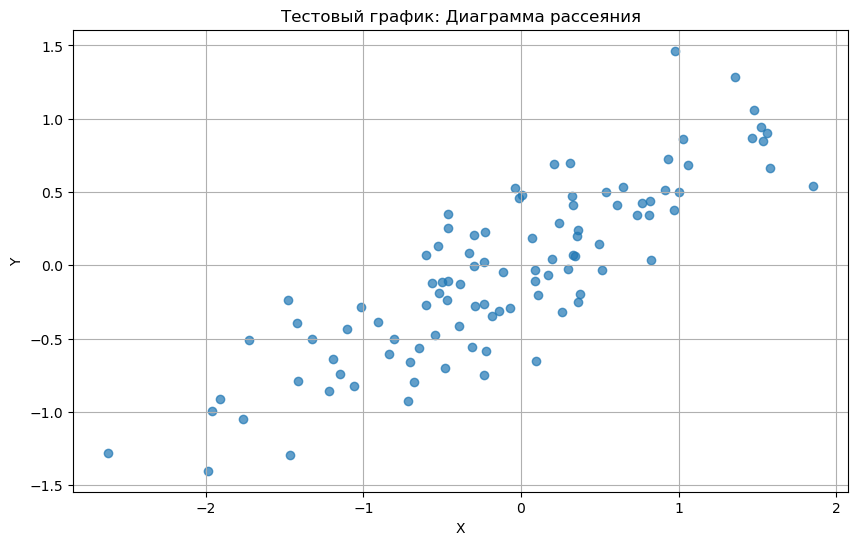

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(data['x'], data['y'], alpha=0.7)
plt.title('Тестовый график: Диаграмма рассеяния')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

## 4. Визуализация данных с помощью Seaborn

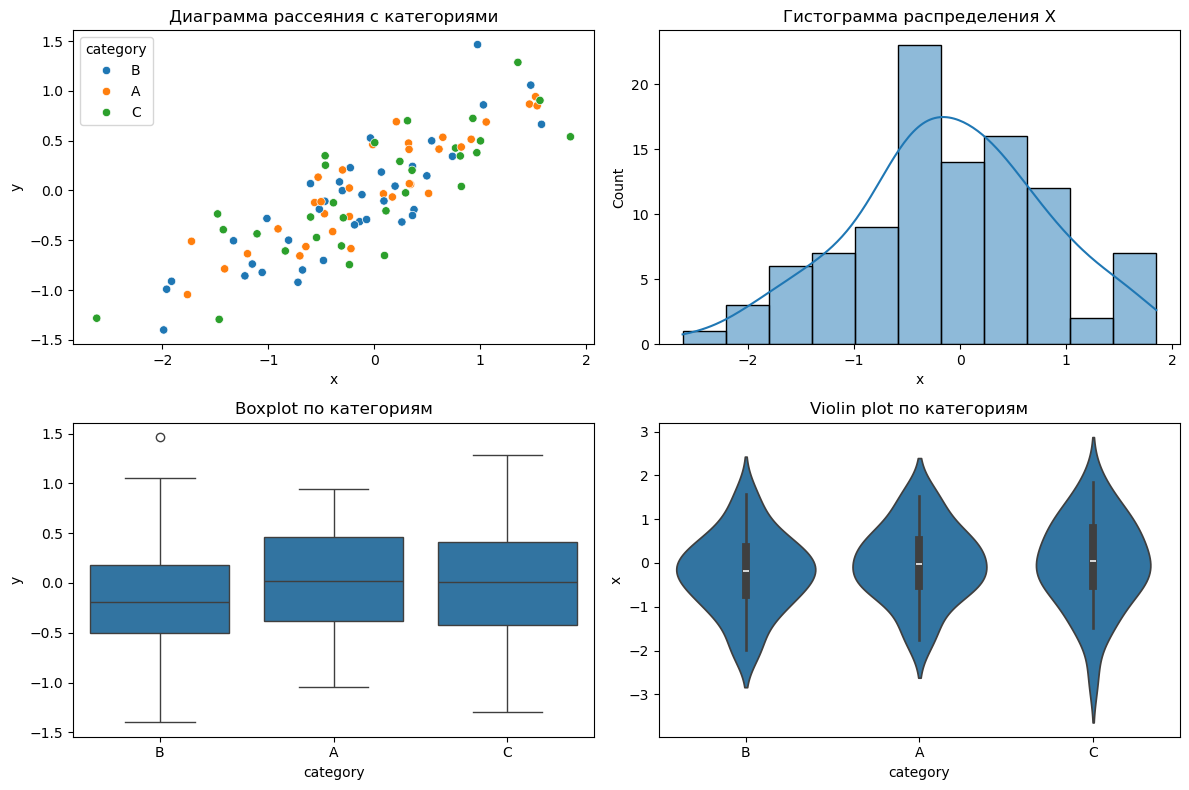

In [9]:
plt.figure(figsize=(12, 8))

# Создаем subplot для нескольких графиков
plt.subplot(2, 2, 1)
sns.scatterplot(data=data, x='x', y='y', hue='category')
plt.title('Диаграмма рассеяния с категориями')

plt.subplot(2, 2, 2)
sns.histplot(data['x'], kde=True)
plt.title('Гистограмма распределения X')

plt.subplot(2, 2, 3)
sns.boxplot(data=data, x='category', y='y')
plt.title('Boxplot по категориям')

plt.subplot(2, 2, 4)
sns.violinplot(data=data, x='category', y='x')
plt.title('Violin plot по категориям')

plt.tight_layout()
plt.show()

## 5. Базовый анализ данных с помощью Pandas

In [10]:
# Описательная статистика
print("Описательная статистика:")
print(data.describe())

# Группировка по категориям
print("\nСредние значения по категориям:")
print(data.groupby('category').mean())

# Корреляционная матрица
print("\nКорреляционная матрица:")
print(data[['x', 'y']].corr())

Описательная статистика:
                x           y
count  100.000000  100.000000
mean    -0.103847   -0.040212
std      0.908168    0.582808
min     -2.619745   -1.400820
25%     -0.600906   -0.444887
50%     -0.126956   -0.038301
75%      0.405952    0.412864
max      1.852278    1.463968

Средние значения по категориям:
                 x         y
category                    
A        -0.027855  0.040222
B        -0.236374 -0.140200
C        -0.023987 -0.005372

Корреляционная матрица:
          x         y
x  1.000000  0.848256
y  0.848256  1.000000


## 6. Тепловая карта корреляций

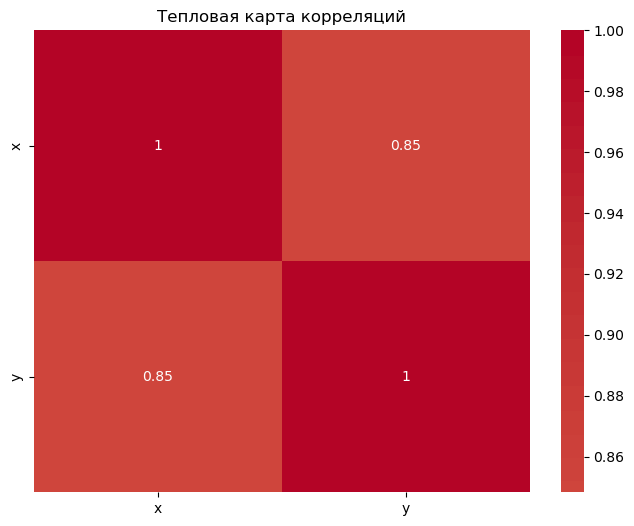

In [11]:
plt.figure(figsize=(8, 6))
correlation_matrix = data[['x', 'y']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Тепловая карта корреляций')
plt.show()

## 7. Проверка работы NumPy

In [12]:
# Создаем массивы NumPy
array1 = np.array([1, 2, 3, 4, 5])
array2 = np.array([5, 4, 3, 2, 1])

print("Массив 1:", array1)
print("Массив 2:", array2)
print("Сумма массивов:", array1 + array2)
print("Произведение массивов:", array1 * array2)
print("Скалярное произведение:", np.dot(array1, array2))
print("Среднее значение массива 1:", np.mean(array1))
print("Стандартное отклонение массива 1:", np.std(array1))

Массив 1: [1 2 3 4 5]
Массив 2: [5 4 3 2 1]
Сумма массивов: [6 6 6 6 6]
Произведение массивов: [5 8 9 8 5]
Скалярное произведение: 35
Среднее значение массива 1: 3.0
Стандартное отклонение массива 1: 1.4142135623730951


## Заключение

Если все ячейки выше выполнились без ошибок и вы видите графики, то ваше окружение для аналитики данных настроено правильно!

Вы можете использовать это окружение для:
- Анализа данных с помощью Pandas
- Научных вычислений с NumPy
- Визуализации данных с Matplotlib и Seaborn
- Создания интерактивных отчетов в Jupyter Notebook